pip install pandas_datareader 설치

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
import seaborn as sns

In [2]:
# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 시작날짜
start = datetime.datetime(2010,1,1)

# 종료날짜
end = datetime.datetime(2020,12,31)

In [4]:
# 삼성전자 주식 데이터를 가져온다.
f = data.DataReader('005930.KS', 'yahoo', start, end)
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13192.374023
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13404.367188
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13714.202148
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13257.604492
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13388.059570
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,72085.835938
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75890.093750
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76768.000000


### 시각화

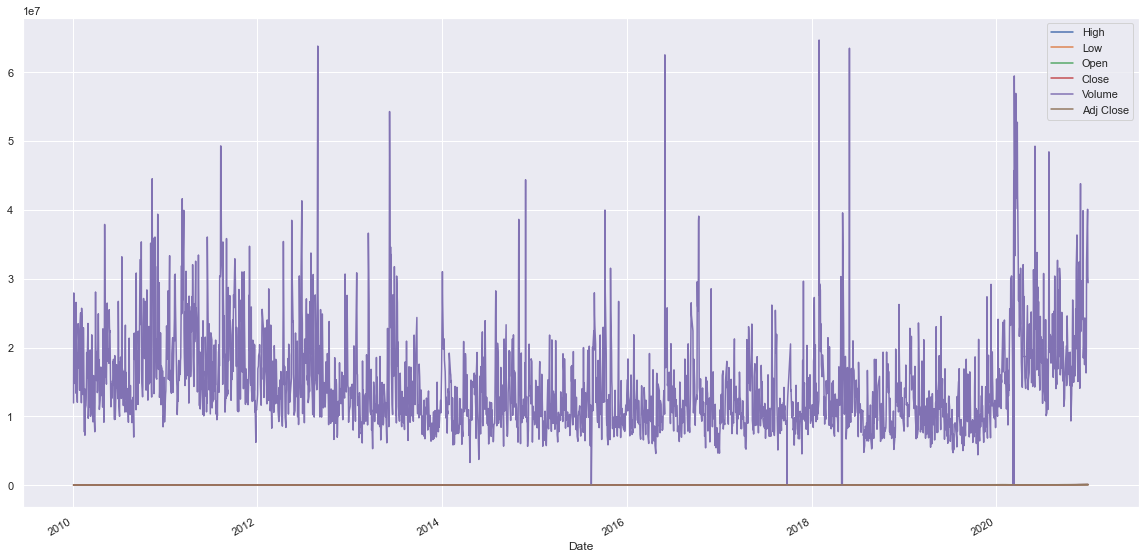

In [5]:
# seaborn에 정의한 그래프 스타일을 적용한다.
sns.set()

f.plot()
plt.show()

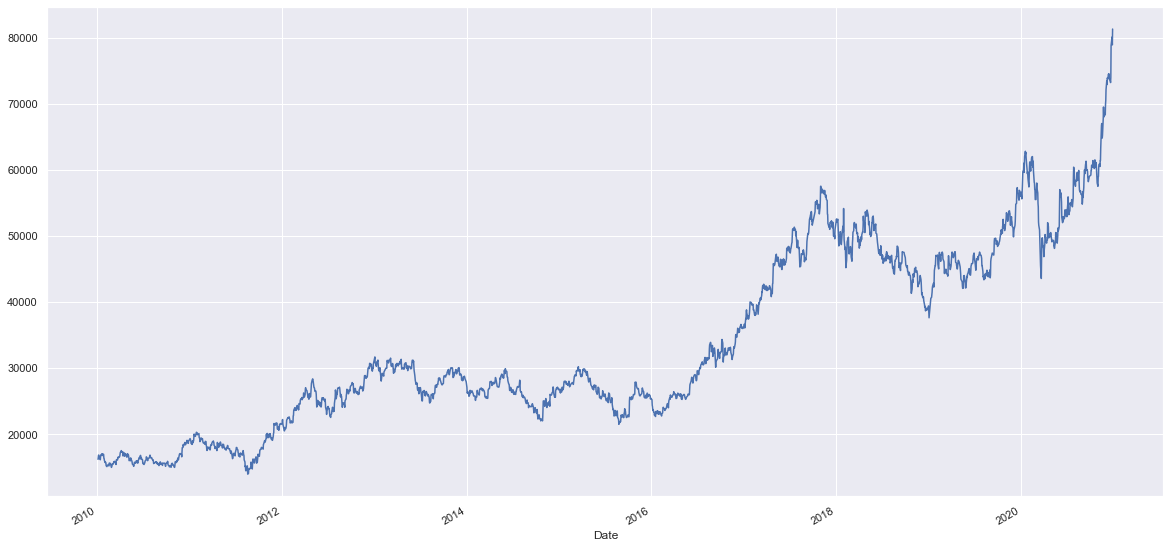

In [6]:
f['High'].plot()
plt.show()

In [9]:
# 'BA', 'Y' : 년도로 나눠서 가져온다.
# '1M' : 월단위로 나눠서 가져온다.
# '1D' : 일별로 나눠서 가져온다.
# 'H' , 'T', 'S' : 시간, 분, 초 단위
# 'W' : 주단위로 나눠서 가져온다.
list(f.resample('BA'))[0]

(Timestamp('2010-12-31 00:00:00', freq='BA-DEC'),
                High      Low     Open    Close      Volume     Adj Close
 Date                                                                    
 2010-01-04  16180.0  16000.0  16060.0  16180.0  11950800.0  13192.374023
 2010-01-05  16580.0  16300.0  16520.0  16440.0  27925850.0  13404.367188
 2010-01-06  16820.0  16520.0  16580.0  16820.0  22948850.0  13714.202148
 2010-01-07  16820.0  16260.0  16820.0  16260.0  22107950.0  13257.604492
 2010-01-08  16420.0  16120.0  16400.0  16420.0  14777550.0  13388.059570
 ...             ...      ...      ...      ...         ...           ...
 2010-12-24  18780.0  18500.0  18780.0  18500.0   8471650.0  15179.338867
 2010-12-27  18600.0  18300.0  18500.0  18440.0  10524200.0  15130.106445
 2010-12-28  19000.0  18520.0  18560.0  18760.0  15650700.0  15392.669922
 2010-12-29  19020.0  18640.0  18700.0  18900.0  11918900.0  15590.645508
 2010-12-30  19040.0  18840.0  18840.0  18980.0   9181500.0  1

In [13]:
# 16222.549801	15914.103586	16081.434263	16070.996016
f.resample('Y').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,16222.549801,15914.103586,16081.434263,16070.996016,1.737205e+07,13147.146461
2011-12-30,18147.822581,17704.516129,17931.612903,17926.209677,1.975747e+07,14792.554258
2012-12-31,25454.112903,24927.500000,25182.741935,25214.596774,1.617344e+07,20915.320872
2013-12-31,28847.611336,28320.242915,28617.327935,28578.542510,1.288338e+07,23837.346241
2014-12-31,26082.285714,25613.469388,25872.653061,25835.918367,1.248746e+07,21772.465497
2015-12-31,26245.943775,25710.682731,25985.702811,25971.405622,1.192952e+07,22219.726045
2016-12-30,29054.146341,28488.861789,28733.739837,28800.081301,1.208214e+07,25056.460144
2017-12-29,46713.221757,45887.949791,46285.355649,46300.502092,1.148688e+07,41121.356237
2018-12-31,47346.942149,46335.165289,46860.785124,46823.471074,1.259780e+07,42588.249338


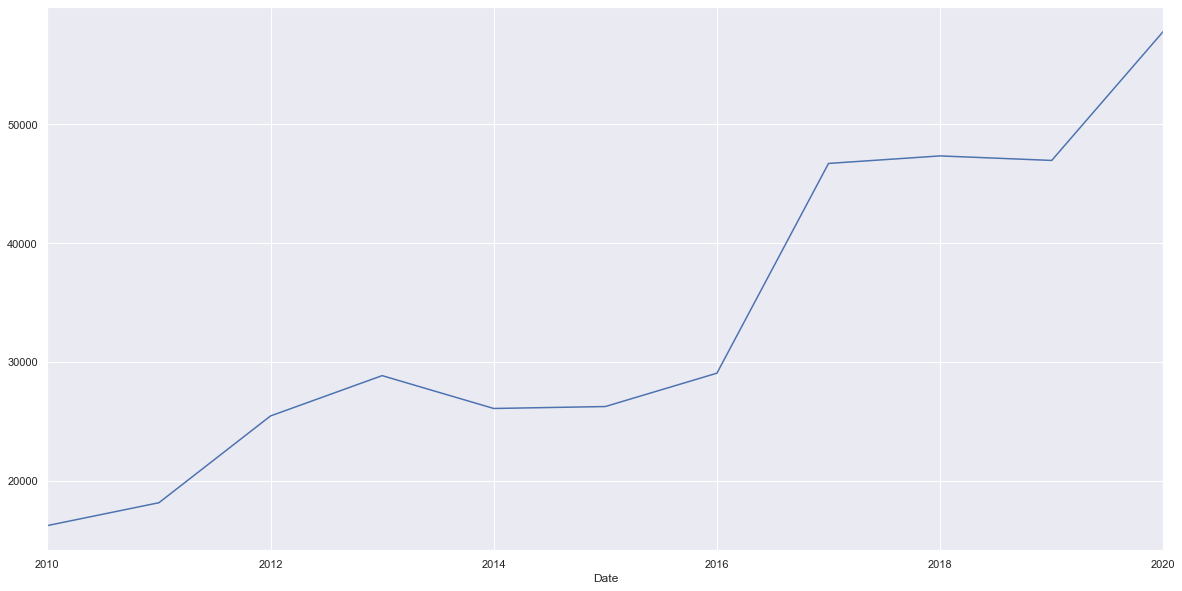

In [14]:
# 년도별 최고가 평균을 그래프로 표현
f['High'].resample('Y').mean().plot()
plt.show()

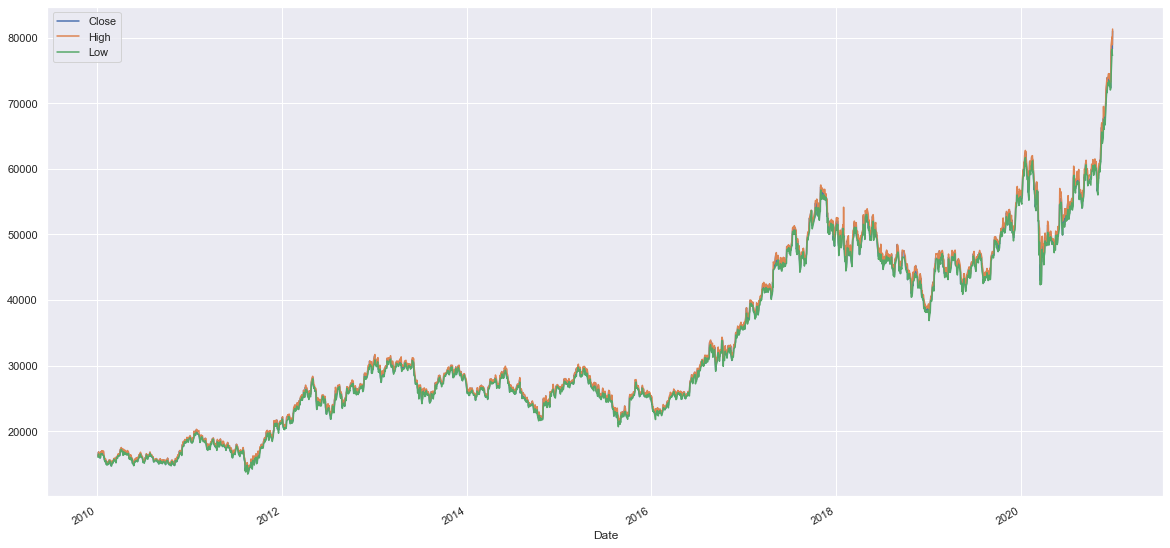

In [17]:
f[['Close','High','Low']].plot()
plt.show()

In [19]:
# 19320
f.asfreq('Y', method='bfill')

[(Timestamp('2010-12-31 00:00:00', freq='A-DEC'),
                 High      Low     Open    Close      Volume     Adj Close
  Date                                                                    
  2010-01-04  16180.0  16000.0  16060.0  16180.0  11950800.0  13192.374023
  2010-01-05  16580.0  16300.0  16520.0  16440.0  27925850.0  13404.367188
  2010-01-06  16820.0  16520.0  16580.0  16820.0  22948850.0  13714.202148
  2010-01-07  16820.0  16260.0  16820.0  16260.0  22107950.0  13257.604492
  2010-01-08  16420.0  16120.0  16400.0  16420.0  14777550.0  13388.059570
  ...             ...      ...      ...      ...         ...           ...
  2010-12-24  18780.0  18500.0  18780.0  18500.0   8471650.0  15179.338867
  2010-12-27  18600.0  18300.0  18500.0  18440.0  10524200.0  15130.106445
  2010-12-28  19000.0  18520.0  18560.0  18760.0  15650700.0  15392.669922
  2010-12-29  19020.0  18640.0  18700.0  18900.0  11918900.0  15590.645508
  2010-12-30  19040.0  18840.0  18840.0  18980.0  

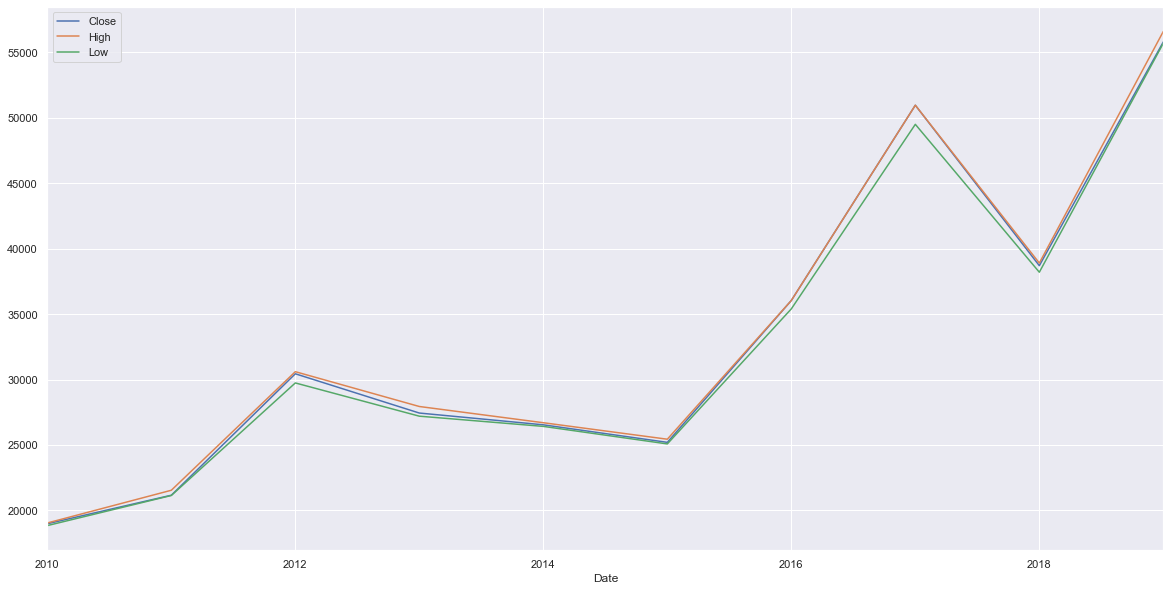

In [25]:
# 19040
a1 = f.asfreq('Y',method='ffill')
a2 = a1[['Close', 'High','Low']]
a2.plot()
plt.show()
